In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Poems_Author_Age.csv')
df.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [3]:
df['content'] = df['content'].str.lower()

Renaissance


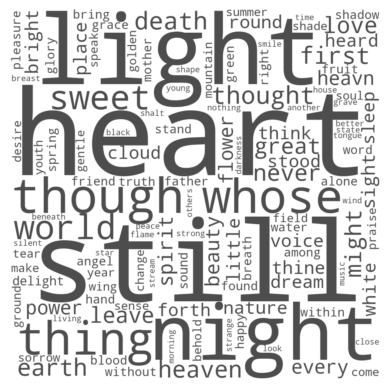

Modern


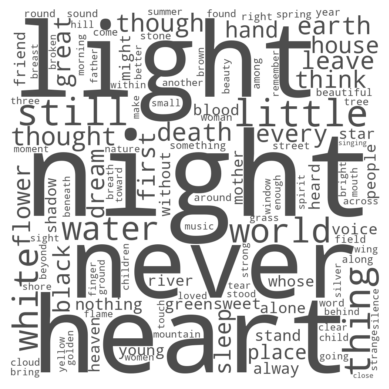

In [9]:
### Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import random
path = 'C:/Users/gadge/OneDrive/Desktop/MachineLearning/Project/plots'

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % 30

## Wordclouds
for genre in df['age'].unique():
    print(genre)
    text = df[df['age'] == genre]['content'].apply(lambda x: ' '.join([i for i in x.split(" ") if (len(i) > 4 and i !='newline')]))
    text = ' '.join([i for i in text.tolist() if len(i) > 3])

    wordcloud = WordCloud(stopwords = STOPWORDS,
                          collocations=True,
                          width = 1000, height = 1000,
                          background_color ='white',
                          max_words = 120).generate(text)
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
               interpolation='bilInear')
    plt.axis('off')
    plt.show()